In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
pip install numpy matplotlib

  Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl (12.7 MB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.3 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.7 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.6 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 1.6 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/8.1 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.5 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.1 MB 1.5 MB/s eta 0:0

In [2]:
pip install micrograd

Note: you may need to restart the kernel to use updated packages.


In [10]:
def f(x):
    return 3*x**2 - 4*x + 5

In [14]:
f(3.0)

20.0

In [18]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [20]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

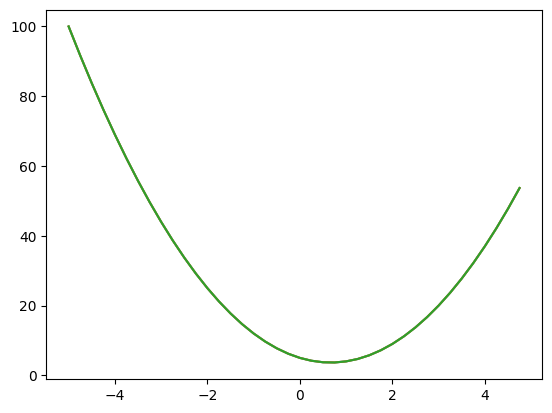

In [28]:
plt.plot(xs, ys)
plt.show()

In [67]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(t, (self,), 'tanh')
        return out



a = Value(2.0, label='a')
b = Value(-3.0,label='b')
c = Value(10.0,label='c')
e = a*b 
e.label = 'e';
d = e + c;
d.label = 'd'
f = Value(-2.0, label='f')
L = d*f
L.label = 'L'


In [49]:
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"


In [57]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = left to right

    nodes, edges = trace(root)
    
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot


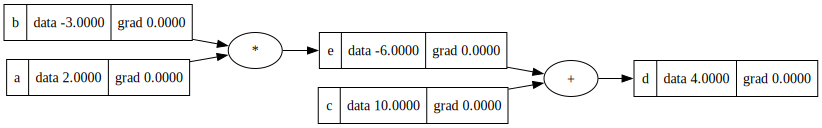

In [59]:
draw_dot(d)

In [61]:
def lol():
    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0,label='b')
    c = Value(10.0,label='c')
    e = a*b 
    e.label = 'e';
    d = e + c;
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = 'L'
    L1 = L.data

    a = Value(2.0 + h, label='a')
    b = Value(-3.0,label='b')
    c = Value(10.0,label='c')
    e = a*b 
    e.label = 'e';
    d = e + c;
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = 'L'
    L2 = L.data

    print((L2 - L1)/h)

lol()




6.000000000021544


In [63]:
L.grad =1.0

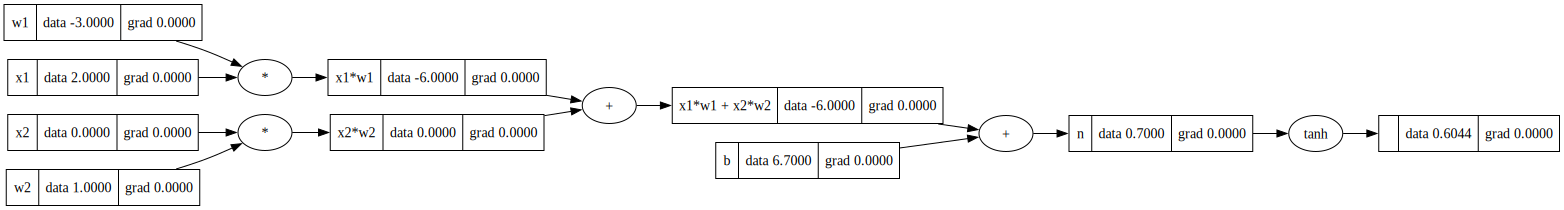

In [71]:
import math
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.7, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1 * w1
x1w1.label = 'x1*w1'

x2w2 = x2 * w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'

# activation
o = n.tanh()
o.label = 'output'

# visualize the computation graph
draw_dot(o)
